# Boston House Prices

## Introduction



## Background

Python Libraries import:

In [1]:
# Import of all the python libraries required for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as kr
import sklearn.model_selection as mod
from matplotlib import rcParams
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)


Using TensorFlow backend.


### Setting up the dataset

In the cell below I imported the dataset from sklearn, converted it to a dataframe to work with. I also added the price to the dataset. 

The head command gives us a first look at the contents of the dataset, showing the first 5 values of each.

In [2]:
# import and preparation of the Boston house price dataset for analysis
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
# and adapted from https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

from sklearn.datasets import load_boston
bostonds = load_boston()  #bostonds is a dictionaray
# print(bostonds.data.shape)
# print(bostonds.keys())
# print(bostonds.feature_names)
# print(bostonds.DESCR)
# print(bostonds.data)

# Convert to a pandas dataframe
boston = pd.DataFrame(bostonds.data)
# Add the feature_names from the bostonds dictionary as columns
boston.columns = bostonds.feature_names
# Add the target attribute, the price, from the dictionary to the dataframe
boston['PRICE'] = bostonds.target
# show summary data and first few lines of dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#print(bostonds.feature_names)
print(bostonds.DESCR)
#print(bostonds.data)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu



### Exploring the Boston Housing dataset

In the cell immediately below we can see some of the key summary statistics for each variable.

In [4]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


All variables have a count of 506 so no missing data

To check how each variable is distributed I have plotted a histogram of each.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79faa98550>,
      dtype=object)

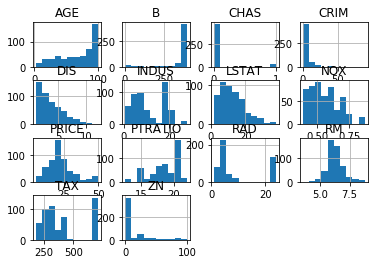

In [5]:
boston.hist()

Check the relationship between the variables in the dataset and their impact on the prices

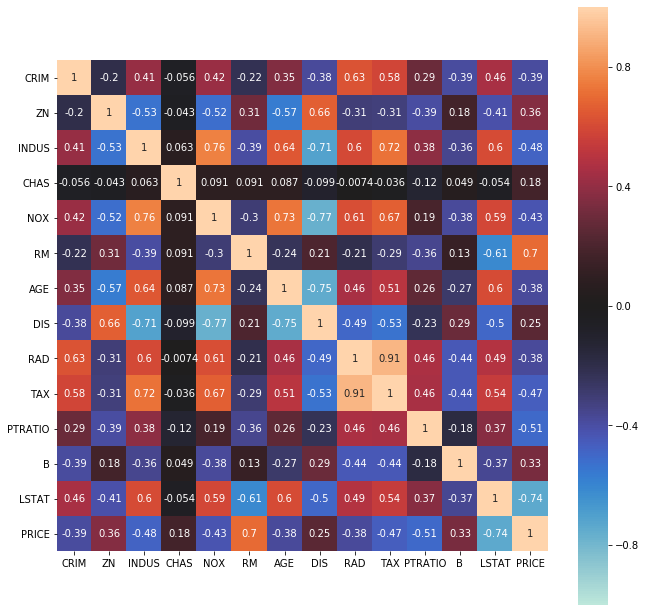

In [6]:
corr = boston.corr()
plt.figure(figsize=(11,11))
ax = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0,square=True, xticklabels=corr.columns.values,yticklabels=corr.columns.values )


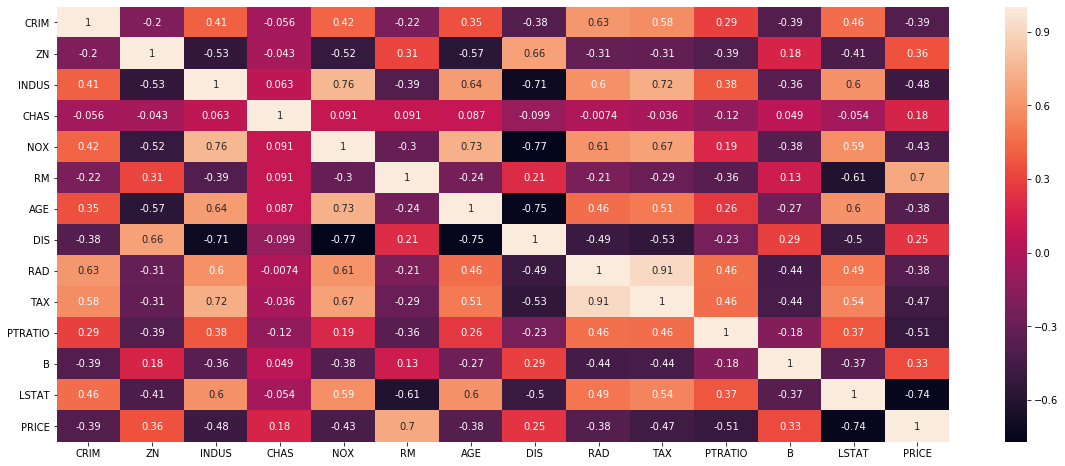

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

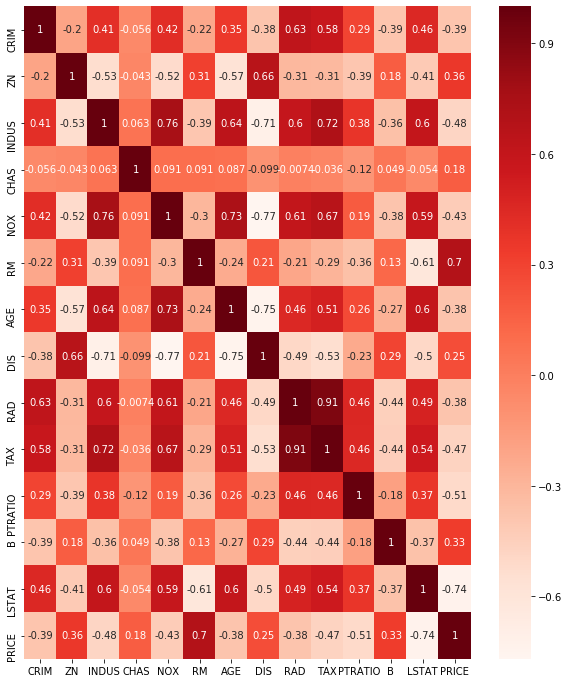

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(10,12))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:

fig = plt.figure(figsize=(13,13))
r = sns.heatmap(corr,annot=True, cmap='BuPu', vmin=-1, vmax=1, center=0, linewidths=.5)
r.set_title("Heatmap of Boston Housing Dataset\n\n")

Text(0.5, 1, 'Heatmap of Boston Housing Dataset\n\n')

In [ ]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      square = True,
                      linewidths = .5,cmap ='BuPu', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})#add the column names as labels


In [ ]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [ ]:
#df.corr

In [ ]:
boston.iloc[0,:]

In [ ]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(units=10, activation='linear', input_dim=13))
m.add(kr.layers.Dense(units=100, activation='sigmoid'))
#m.add(kr.layers.Dense(units=100, activation='linear'))
#m.add(kr.layers.Dense(units=100, activation='sigmoid'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
#m.add(kr.layers.Dense(units=1000, activation='tanh'))
#m.add(kr.layers.Dense(units=300, activation='linear'))
#m.add(kr.layers.Dense(units=300, activation='sigmoid'))
m.add(kr.layers.Dense(units=10, activation='linear' ))
m.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
#m.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
m.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

### Build Keras Model

In [ ]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 100 neurons and an input layer with 13 .
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))
# model.add(kr.layers.Dense(units=100, activation='linear', input_dim=13))

model.add(kr.layers.Dense(units=100, activation='linear', input_dim=5))
model.add(kr.layers.Dense(units=100, activation='linear'))
model.add(kr.layers.Dense(units=100, activation='sigmoid'))
model.add(kr.layers.Dense(units=100, activation='linear' ))
#model.add(kr.layers.Dense(units=1, activation='linear'))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=1, activation='linear'))

# Build the graph.
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['accuracy'])

In [ ]:
boston.iloc[0,:]

In [ ]:
inputs = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
#inputs = boston[['CRIM','NOX','ZN','PTRATIO','LSTAT']]

In [ ]:
outputs = boston['PRICE']
outputs

In [ ]:


# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)
#inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.8)



In [ ]:
m.fit(inputs_train, outputs_train, epochs=15, batch_size=20)

### Train

In [ ]:
# Train the neural network.
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10)
#model.fit(inputs_train, outputs_train, epochs=15, batch_size=10) loss 72
#model.fit(inputs_train, outputs_train, epochs=32, batch_size=10)

#### Plot

In [ ]:

plt.rcParams['figure.figsize'] = (10, 10)
# all values through the model
#p = model.predict(inputs)
p = m.predict(inputs)
# Plot the values.

plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k:', label='Original')
plt.legend()

In [ ]:
References

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air',

This course
Books
Deep Learning with Python Jason Brownlee
Deep Learning Tutorial Steve Nouri
https://keras.io keras documentation 
    
https://medium.com/@himanshuxd/the-guide-to-rigorous-descriptive-statistics-for-machine-learning-and-data-science-9209f88e4363
